In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import cm

In [36]:
train = pd.read_csv('../data/train.csv')
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

In [38]:
train['City'].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Diyarbakır         3
Tekirdağ           3
Eskişehir          3
Kayseri            3
Adana              3
Aydın              2
Muğla              2
Konya              2
Trabzon            2
Kırklareli         1
Gaziantep          1
Karabük            1
Tokat              1
Afyonkarahisar     1
Edirne             1
Amasya             1
Kocaeli            1
Kütahya            1
Bolu               1
Denizli            1
Osmaniye           1
Isparta            1
Balıkesir          1
Uşak               1
Şanlıurfa          1
Kastamonu          1
Elazığ             1
Name: City, dtype: int64

In [39]:
train['City Group'].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [40]:
train['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [41]:
test = pd.read_csv('../data/test.csv')
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [42]:
train.drop(['Id', 'Open Date', 'City'], axis=1, inplace=True)
test.drop(['Id', 'Open Date', 'City'], axis=1, inplace=True)

In [43]:
train.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,Other,IL,2,4.0,2.0,5.0,2,3,5,5,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,Other,IL,6,4.5,6.0,6.0,4,4,10,8,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,Other,IL,3,4.0,3.0,4.0,2,2,5,5,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [44]:
test.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,Other,FC,1,4.0,4.0,4.0,1,2,5,4,...,2.0,3.0,0,0,0,0,0,0,0,0
1,Other,IL,3,4.0,4.0,4.0,2,2,5,3,...,1.0,3.0,0,0,0,0,0,0,0,0
2,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,...,2.0,3.0,0,0,0,0,0,0,0,0
3,Other,IL,2,4.0,4.0,4.0,2,3,5,4,...,2.0,3.0,0,4,0,0,0,0,0,0
4,Other,FC,2,4.0,4.0,4.0,1,2,5,4,...,5.0,3.0,0,0,0,0,0,0,0,0


In [45]:
test['Type'].value_counts()

FC    57019
IL    40447
DT     2244
MB      290
Name: Type, dtype: int64

In [46]:
train['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [47]:
city_group_encoder = LabelEncoder()
scaler = StandardScaler()

train['City Group'] = city_group_encoder.fit_transform(train['City Group'])
test['City Group'] = city_group_encoder.transform(test['City Group'])

train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

X = train.drop(['revenue'], axis=1)
y = train[['revenue']]

test.drop(["Type_MB"], axis=1, inplace=True)

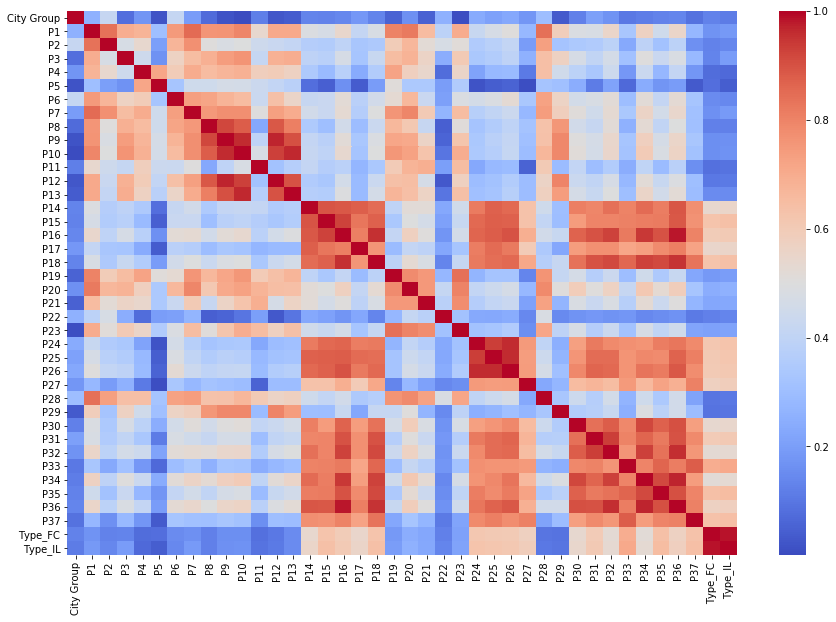

In [48]:
corr_matrix = X.corr().abs()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap=cm.coolwarm, annot=False)
plt.savefig('heatmap.png')

In [49]:
condition = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)

In [50]:
upper = corr_matrix.where(condition)
upper

,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P30,P31,P32,P33,P34,P35,P36,P37,Type_FC,Type_IL
City Group,NaN,0.258556,0.421095,0.082172,0.174134,0.019195,0.416644,0.193106,0.071993,0.018305,...,0.123097,0.204542,0.169750,0.106115,0.117024,0.127973,0.136617,0.089976,0.126652,0.114075
P1,NaN,NaN,0.836671,0.695928,0.677941,0.302820,0.747296,0.853753,0.760820,0.765743,...,0.487589,0.479175,0.552593,0.329795,0.570835,0.449182,0.554951,0.277601,0.172760,0.188354
P2,NaN,NaN,NaN,0.473551,0.540322,0.203003,0.673106,0.769842,0.505116,0.481635,...,0.342005,0.353477,0.389376,0.234991,0.394319,0.314798,0.387938,0.161162,0.127136,0.141087
P3,NaN,NaN,NaN,NaN,0.443606,0.168891,0.570486,0.651489,0.689173,0.741967,...,0.473089,0.406701,0.463217,0.312269,0.501575,0.428504,0.484942,0.284065,0.130387,0.192369
P4,NaN,NaN,NaN,NaN,NaN,0.715406,0.595724,0.700482,0.654594,0.675336,...,0.387747,0.333626,0.440795,0.182820,0.434245,0.277902,0.411664,0.177916,0.076744,0.067758
P5,NaN,NaN,NaN,NaN,NaN,NaN,0.326524,0.446154,0.447577,0.465662,...,0.244032,0.112603,0.215568,0.071079,0.243040,0.173309,0.193652,0.033548,0.079878,0.043483
P6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.738388,0.720144,0.676323,...,0.460618,0.477593,0.519243,0.300611,0.519635,0.413645,0.524552,0.327594,0.153210,0.142112
P7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751196,0.775003,...,0.509213,0.452471,0.531011,0.339178,0.562561,0.457721,0.543563,0.309678,0.161572,0.190290
P8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919956,...,0.454937,0.420425,0.516617,0.256416,0.524474,0.405709,0.499777,0.308294,0.124121,0.125554
P9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502670,0.467334,0.544749,0.326869,0.582042,0.467916,0.551953,0.330927,0.159390,0.163249


In [51]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['P10', 'P12', 'P13', 'P18', 'P26', 'P36', 'Type_IL']

In [52]:
X.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)

In [53]:
y.head()

,revenue
0,5653753.0
1,6923131.0
2,2055379.0
3,2675511.0
4,4316715.0


In [54]:
X.head()

,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P37,Type_FC
0,0,4,5.0,4.0,4.0,2,2,5,4,5,...,2.0,3.0,5,3,4,5,5,4,4,0
1,0,4,5.0,4.0,4.0,1,2,5,5,5,...,3.0,3.0,0,0,0,0,0,0,0,1
2,1,2,4.0,2.0,5.0,2,3,5,5,5,...,1.0,3.0,0,0,0,0,0,0,0,0
3,1,6,4.5,6.0,6.0,4,4,10,8,10,...,2.5,7.5,25,12,10,6,18,12,6,0
4,1,3,4.0,3.0,4.0,2,2,5,5,5,...,1.0,3.0,5,1,3,2,3,4,3,0


In [55]:
train.head()

,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P31,P32,P33,P34,P35,P36,P37,revenue,Type_FC,Type_IL
0,0,4,5.0,4.0,4.0,2,2,5,4,5,...,3,4,5,5,4,3,4,5653753.0,0,1
1,0,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,0,0,6923131.0,1,0
2,1,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,0,2055379.0,0,1
3,1,6,4.5,6.0,6.0,4,4,10,8,10,...,12,10,6,18,12,12,6,2675511.0,0,1
4,1,3,4.0,3.0,4.0,2,2,5,5,5,...,1,3,2,3,4,3,3,4316715.0,0,1


In [56]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15)

X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)

test = scaler.transform(test)

In [57]:
X_train[:5, :]

array([[ 1.16933611e+00, -2.78149447e-01, -2.13839167e-01,
        -2.86094263e-01, -2.77618116e-01, -7.47964109e-01,
        -6.11985853e-01, -7.19723679e-02, -5.21491555e-03,
        -1.71203796e-01, -5.92748045e-01, -5.01612805e-01,
        -5.61894129e-01, -5.33157436e-01, -4.97092863e-01,
        -4.60474176e-01, -3.36172720e-01, -6.59077936e-01,
        -1.48256596e-01, -5.03202921e-01, -5.83766350e-01,
        -5.65528899e-01, -6.02660248e-01, -4.97105093e-01,
        -6.23202094e-01, -4.85834431e-01, -5.37888878e-01,
        -4.66927344e-01, -6.60917902e-01, -4.64491519e-01,
        -5.83351721e-01, -6.32737089e-01,  8.85785180e-01],
       [-8.55186110e-01,  1.10589539e-01,  4.75198149e-01,
        -2.86094263e-01, -2.77618116e-01,  7.05626518e-02,
        -1.08508130e-01, -7.19723679e-02, -6.10145119e-01,
        -7.91817555e-01,  9.81880349e-01, -5.01612805e-01,
        -5.61894129e-01, -5.33157436e-01, -4.97092863e-01,
        -2.67640225e-01, -6.33852380e-01, -7.98882347e-

In [58]:
X_val[:5, :5]

array([[-0.85518611,  0.88806751,  0.13067949,  1.85499829,  1.70414813],
       [ 1.16933611,  0.11058954,  0.47519815, -2.42718682,  0.713265  ],
       [ 1.16933611, -0.66688843, -1.5919138 , -0.28609426, -0.27761812],
       [-0.85518611,  3.22050143,  2.19779144,  1.85499829,  1.70414813],
       [-0.85518611,  0.11058954,  0.47519815, -0.28609426, -0.27761812]])

In [59]:
len(test[0])

33

In [61]:
np.where(y['revenue'].values < 0)

(array([], dtype=int64),)